## Name - John Reddy Peasari
## Course no - HDS 5230 - 04
## Assignment - Week06

In [608]:
import dask.dataframe as dd
import dask.array as da
from dask.distributed import Client
from dask import delayed, compute
import dask
import pandas as pd
import numpy as np
client = Client(n_workers = 2, threads_per_worker = 2, memory_limit = "2GB")
client

Client Scheduler: tcp://127.0.0.1:62662 Dashboard: http://127.0.0.1:62663/status,Cluster Workers: 2 Cores: 4 Memory: 4.00 GB


## Importing the timeseries data into dask dataframe


In [609]:
df = dd.read_csv("timeseries.csv",dtype={'cases': 'float64',
       'county': 'object',
       'deaths': 'float64',
       'recovered': 'float64',
       'state': 'object',"date":"string"})
df

,locationID,slug,name,level,city,county,state,country,lat,long,population,aggregate,tz,cases,deaths,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,date
npartitions=4,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,float64,object,object,object,float64,float64,int64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [610]:
df.head() ## Displaying only top five rows

,locationID,slug,name,level,city,county,state,country,lat,long,...,deaths,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,date
0,iso1:ad,ad,Andorra,country,NaN,NaN,NaN,Andorra,42.55,1.58,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22
1,iso1:ad,ad,Andorra,country,NaN,NaN,NaN,Andorra,42.55,1.58,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-23
2,iso1:ad,ad,Andorra,country,NaN,NaN,NaN,Andorra,42.55,1.58,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24
3,iso1:ad,ad,Andorra,country,NaN,NaN,NaN,Andorra,42.55,1.58,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-25
4,iso1:ad,ad,Andorra,country,NaN,NaN,NaN,Andorra,42.55,1.58,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-26


In [611]:
df.dtypes ## Displaying the types of columns

locationID               object
slug                     object
name                     object
level                    object
city                    float64
county                   object
state                    object
country                  object
lat                     float64
long                    float64
population                int64
aggregate               float64
tz                       object
cases                   float64
deaths                  float64
recovered               float64
active                  float64
tested                  float64
hospitalized            float64
hospitalized_current    float64
discharged              float64
icu                     float64
icu_current             float64
date                     string
dtype: object

## Question 3.1 - Creating a new dataframe object that consists of samples (i.e., rows) corresponding to states in the US.

In [612]:
### Creating a dask dataframe with states (i.e., rows) with corresponding states in the US
df1 = df[df["country"] == "United States"]
df1.compute()

,locationID,slug,name,level,city,county,state,country,lat,long,...,deaths,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,date
239811,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22
239812,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-23
239813,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24
239814,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-25
239815,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83523,iso1:us#iso2:us-wy#fips:56045,weston-county-wyoming-us,"Weston County, Wyoming, United States",county,NaN,Weston County,Wyoming,United States,43.84,-104.57,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-02
83524,iso1:us#iso2:us-wy#fips:56045,weston-county-wyoming-us,"Weston County, Wyoming, United States",county,NaN,Weston County,Wyoming,United States,43.84,-104.57,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-03
83525,iso1:us#iso2:us-wy#fips:56045,weston-county-wyoming-us,"Weston County, Wyoming, United States",county,NaN,Weston County,Wyoming,United States,43.84,-104.57,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-04
83526,iso1:us#iso2:us-wy#fips:56045,weston-county-wyoming-us,"Weston County, Wyoming, United States",county,NaN,Weston County,Wyoming,United States,43.84,-104.57,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-05


## Question 3.2- Calculating per capita mortality rate

In [613]:
## Creating a dataframe that only contains necessary columns for further computation
df2 = df1[["state","country","population","cases","deaths","recovered","date"]]
df2.compute()

,state,country,population,cases,deaths,recovered,date
239811,NaN,United States,325145963,NaN,NaN,NaN,2020-01-22
239812,NaN,United States,325145963,1.0,NaN,NaN,2020-01-23
239813,NaN,United States,325145963,2.0,NaN,NaN,2020-01-24
239814,NaN,United States,325145963,2.0,NaN,NaN,2020-01-25
239815,NaN,United States,325145963,5.0,NaN,NaN,2020-01-26
...,...,...,...,...,...,...,...
83523,Wyoming,United States,6927,39.0,0.0,NaN,2020-10-02
83524,Wyoming,United States,6927,41.0,0.0,NaN,2020-10-03
83525,Wyoming,United States,6927,42.0,0.0,NaN,2020-10-04
83526,Wyoming,United States,6927,44.0,0.0,NaN,2020-10-05


In [614]:
## Calculating mean population for each state by grouping by state
## Calculating deaths,cases,recovered by grouping state and using max() function, as the values are cummulative throughout the data
ddf1= df2.groupby(['state']).population.mean().compute()
ddf2 = df2.groupby(['state']).deaths.max().compute()
ddf3 = df2.groupby(['state']).cases.max().compute()
ddf4 = df2.groupby(['state']).recovered.max().compute()

In [615]:
data = [ddf1,ddf2,ddf3,ddf4] ## Combining all the dataframes in list
final_df = dd.concat(data,axis=1).compute() ## Concatenating all the datafames
final_df

,population,deaths,cases,recovered
state,,,,
Alabama,1.442113e+05,2559.0,159713.0,54223.0
Alaska,4.876967e+04,58.0,8613.0,2340.0
American Samoa,5.568900e+04,0.0,0.0,NaN
Arizona,9.098396e+05,5707.0,221070.0,32151.0
Arkansas,9.616907e+04,1447.0,87430.0,61245.0
California,1.339739e+06,16171.0,835507.0,348999.0
Colorado,1.771919e+05,2069.0,73515.0,6093.0
Connecticut,7.922860e+05,4517.0,56555.0,9049.0
Delaware,4.868820e+05,609.0,18308.0,9920.0


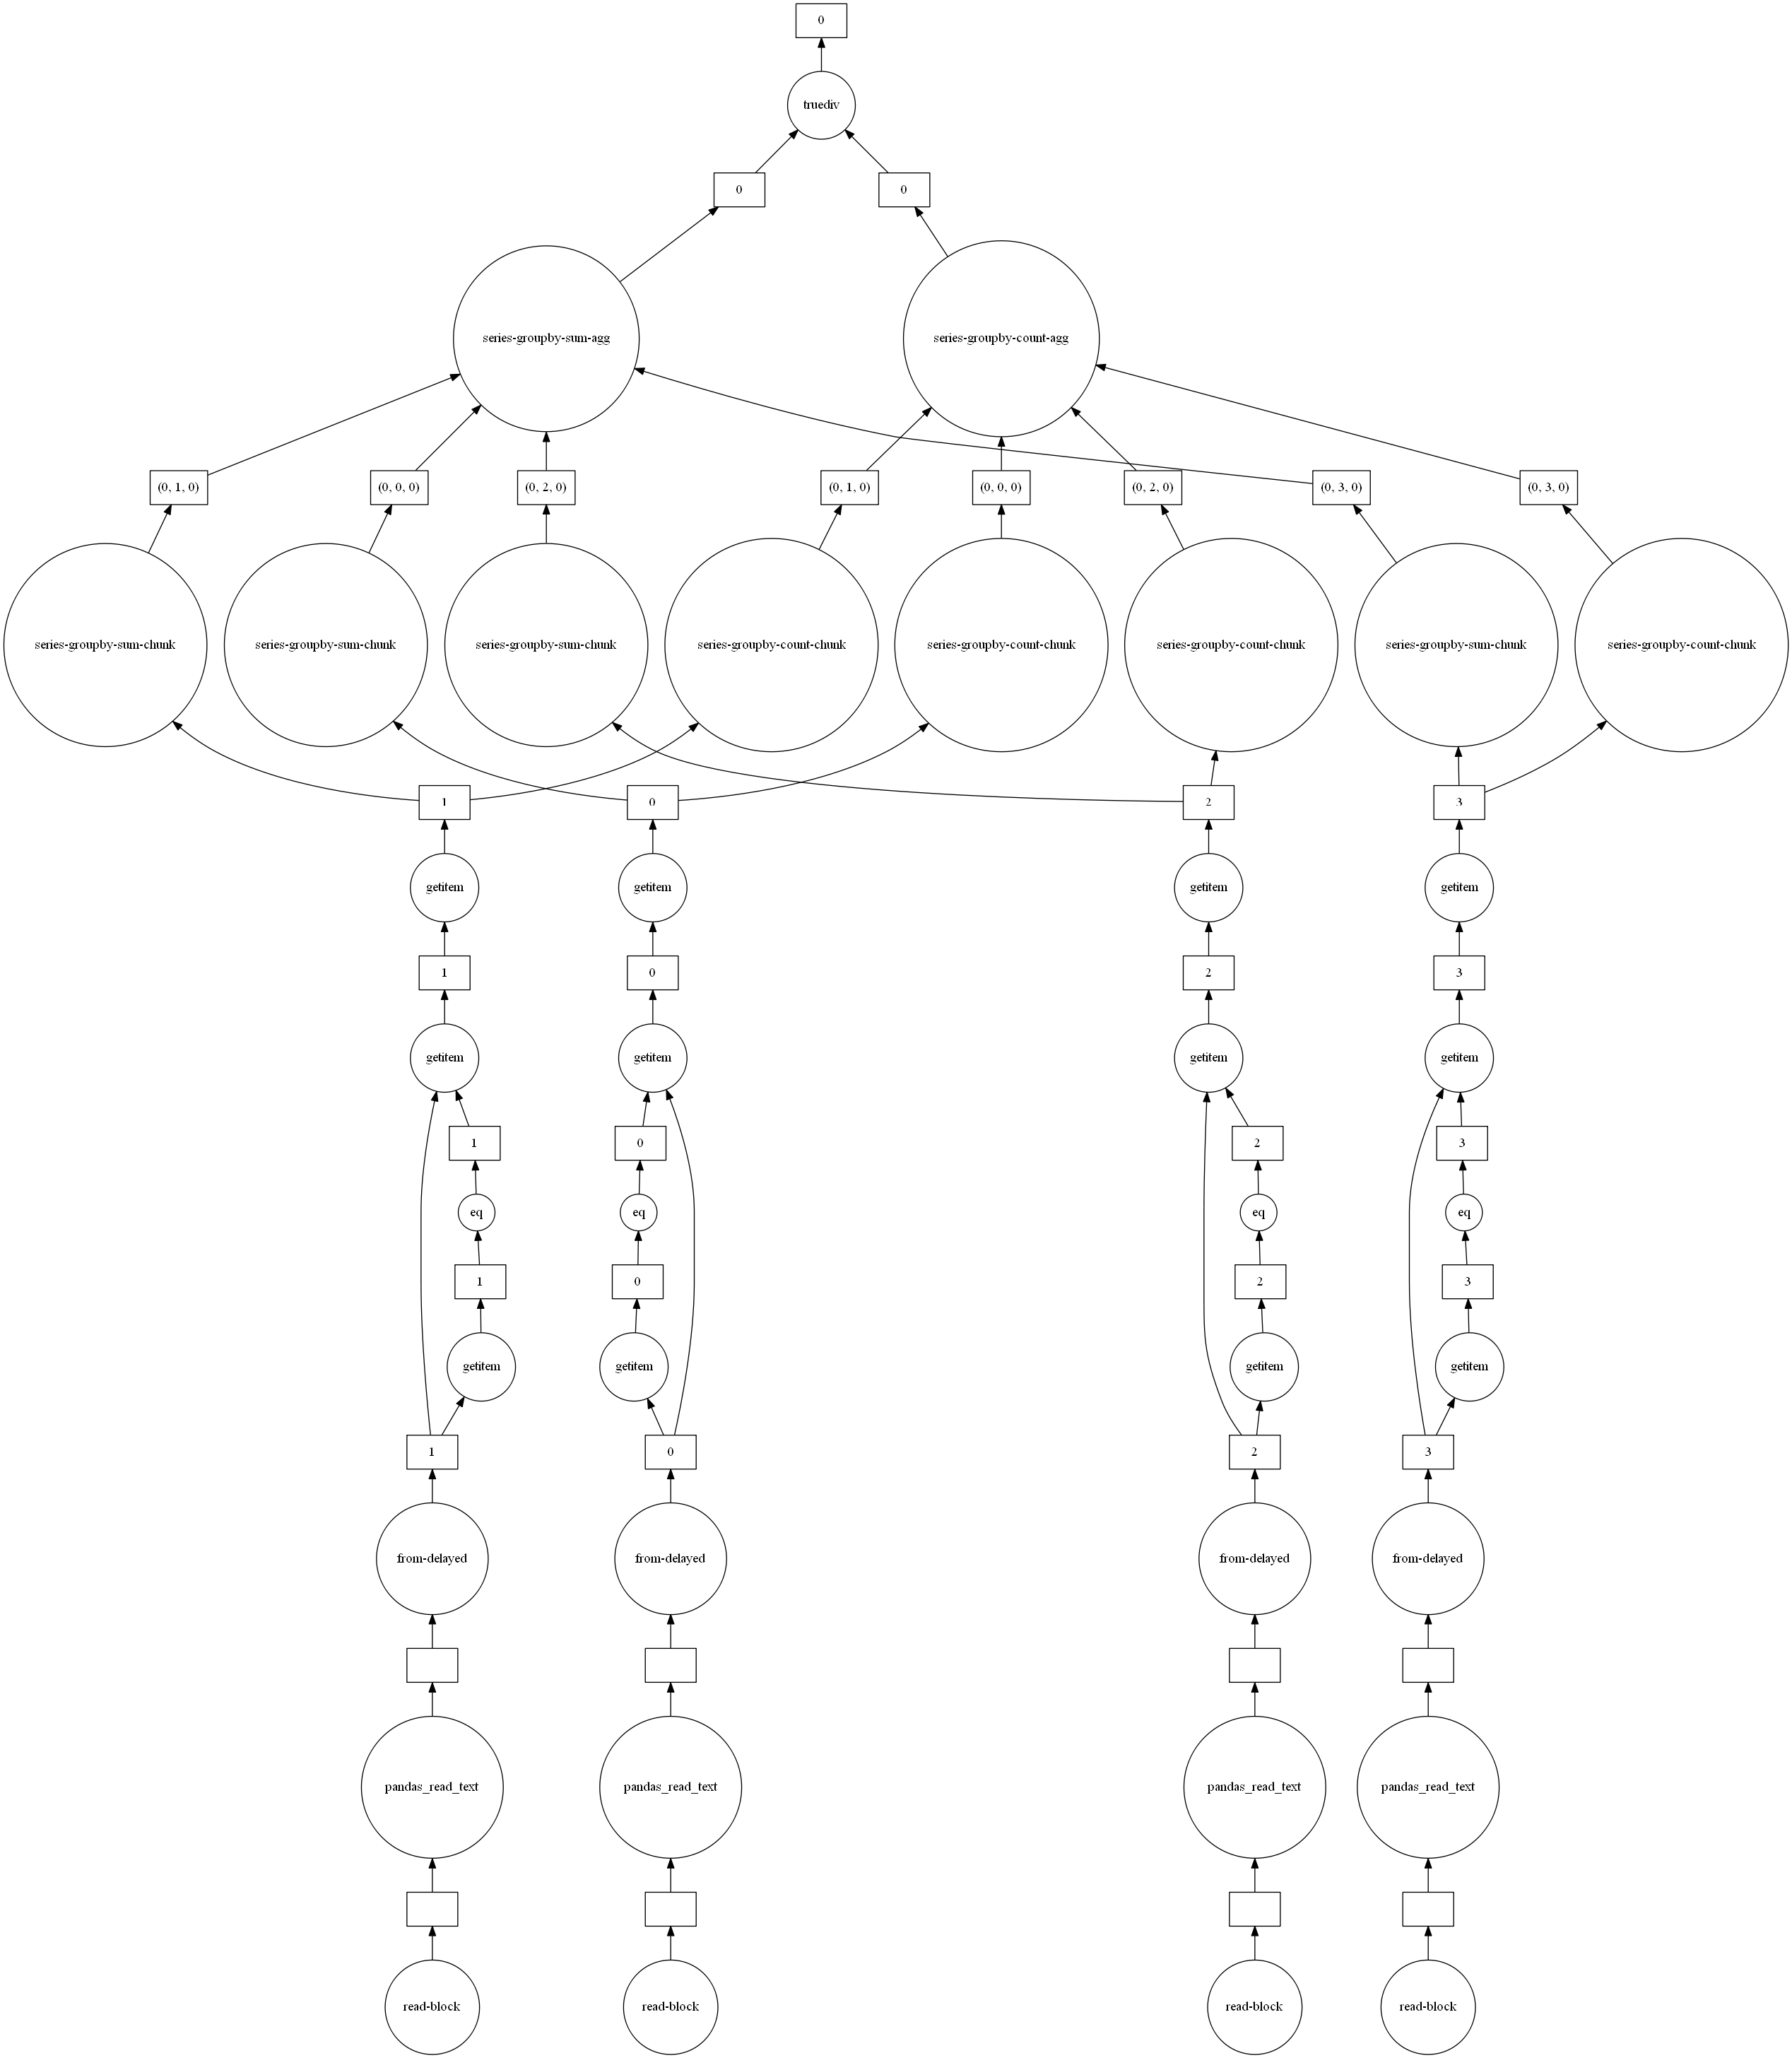

In [616]:
(df2.groupby(['state']).population.mean()).visualize() ## Producing the image of the task graph
### Parallel computating could efficiently do the job than distributed computing 

In [617]:
## Computing per capita mortality rate and sorting 
final_df["per_capita_mortality"] = (final_df["deaths"] / final_df["population"])*100
final_df.sort_values(by=['per_capita_mortality'])

,population,deaths,cases,recovered,per_capita_mortality
state,,,,,
American Samoa,5.568900e+04,0.0,0.0,NaN,0.000000
Northern Mariana Islands,5.514400e+04,2.0,75.0,29.0,0.003627
United States Virgin Islands,1.049010e+05,20.0,1327.0,1070.0,0.019066
Puerto Rico,3.411307e+06,695.0,50501.0,NaN,0.020373
Guam,1.677720e+05,54.0,2753.0,1042.0,0.032187
Hawaii,4.719573e+05,156.0,12820.0,3063.0,0.033054
Vermont,8.319853e+04,58.0,1817.0,1468.0,0.069713
Maine,1.744745e+05,142.0,5565.0,4839.0,0.081387
"Washington, D.C.",7.057490e+05,631.0,15547.0,11452.0,0.089409


## Question 3.3 - Calculating Case Fatility Rate

In [618]:
## Here, I have stripped year and the day in date column.
## We are not intrested in the year and date. So, stripping those, we will have all the data corresponding to that month.
## Example, id the date are 2020-01-01,2020-01-02,2020-01-03, stripping gives, 01,01,01. That can be further used to compute the results.
## If there was another year, lets say 2021, then this approach will fail. As out dateset is having only one year i.e., 2020 this approach should work
df1['date'] = df1.date.str[5:7]
df1.head()

,locationID,slug,name,level,city,county,state,country,lat,long,...,deaths,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,date
239811,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
239812,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
239813,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
239814,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
239815,iso1:us,us,United States,country,NaN,NaN,NaN,United States,45.67,-112.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01


In [583]:
%%time ## Using delayed, the output appeared bit faster compared to normal dask computation
df_deaths= delayed(df1.groupby(['date',"state"]).deaths.max().compute()) ### Getting deaths using max() function by grouping state. Deaths are cumulative


Wall time: 3.84 s


In [584]:
%%time
df_deaths= df1.groupby(['date',"state"]).deaths.max().compute() ### Getting deaths using max() function by grouping state. Deaths are cumulative


Wall time: 4.08 s


In [619]:
df_deaths= df1.groupby(['date',"state"]).deaths.max().compute() ### Getting deaths using max() function by grouping state. Deaths are cumulative
df_deaths = df_deaths.reset_index("state") ## Resetting the index
df_deaths.head()

,state,deaths
date,,
01,Alabama,0.0
01,Alaska,0.0
01,American Samoa,NaN
01,Arizona,0.0
01,Arkansas,0.0


In [620]:
df_cases= df1.groupby(['date',"state"]).cases.max().compute() ### Getting cases using max() function by grouping state
df_cases = df_cases.reset_index("state")
df_cases.head()

,state,cases
date,,
01,Alabama,0.0
01,Alaska,0.0
01,American Samoa,NaN
01,Arizona,1.0
01,Arkansas,0.0


In [547]:
# df_recovered= df1.groupby(['date',"state"]).recovered.max().compute() ### Getting recovered using max() function by grouping state
# df_recovered = df_recovered.reset_index("state")
# df_recovered.head()

In [621]:
data1 = [df_deaths,df_cases]
df_CFR = dd.concat(data1,axis=1).compute()
df_CFR = df_CFR.T.drop_duplicates().T
df_CFR.head()

,state,deaths,cases
date,,,
01,Alabama,0,0
01,Wisconsin,0,0
01,Northern Mariana Islands,NaN,NaN
01,North Carolina,0,0
01,Montana,0,0


In [507]:
# df_CFR["CFR"] = (df_CFR["deaths"] / (df_CFR["deaths"] + df_CFR["recovered"]))

In [622]:
df_CFR['CFR'] = df_CFR.deaths.div(df_CFR.cases.where(df_CFR.cases != 0,np.nan )) ## Doing this to avoid division by floting point value error
df_CFR['CFR'] = df_CFR['CFR'].replace(np.nan, 0)

In [623]:
df_CFR.head()

,state,deaths,cases,CFR
date,,,,
01,Alabama,0,0,0.0
01,Wisconsin,0,0,0.0
01,Northern Mariana Islands,NaN,NaN,0.0
01,North Carolina,0,0,0.0
01,Montana,0,0,0.0


In [624]:
### Displaying data for all the months, all the states
lst = []
k = 0
for i in range(1,11):
    j = i * 56
    xx = df_CFR[k:j]
    lst.append(xx)
    print(xx)
    k = k + 56

                             state deaths cases  CFR
date                                                
01                         Alabama      0     0  0.0
01                       Wisconsin      0     0  0.0
01        Northern Mariana Islands    NaN   NaN  0.0
01                  North Carolina      0     0  0.0
01                         Montana      0     0  0.0
01                        Missouri      0     0  0.0
01                     Mississippi      0     0  0.0
01                       Minnesota      0     0  0.0
01                        Michigan      0     0  0.0
01                        Virginia      0     0  0.0
01                   Massachusetts      0     1  0.0
01                           Maine      0     0  0.0
01                       Louisiana      0     0  0.0
01                        Kentucky      0     0  0.0
01                          Kansas      0     0  0.0
01                            Iowa      0     0  0.0
01                         Indiana      0     

## Question 3.4 - Calculating change in CFR rate

In [625]:
############ Question 3
df_CFR = df_CFR.reset_index()
df_CFR.head()

,date,state,deaths,cases,CFR
0,01,Alabama,0,0,0.0
1,01,Wisconsin,0,0,0.0
2,01,Northern Mariana Islands,NaN,NaN,0.0
3,01,North Carolina,0,0,0.0
4,01,Montana,0,0,0.0


In [626]:
df_CFR["date"] = pd.to_numeric(df_CFR["date"])

In [627]:
df_CFR.head()

,date,state,deaths,cases,CFR
0,1,Alabama,0,0,0.0
1,1,Wisconsin,0,0,0.0
2,1,Northern Mariana Islands,NaN,NaN,0.0
3,1,North Carolina,0,0,0.0
4,1,Montana,0,0,0.0


In [628]:
df_CFR_new = df_CFR.set_index(['state', 'date']) ## Setting state and data as indexes

In [629]:
df_CFR_new.head()

,,deaths,cases,CFR
state,date,,,
Alabama,1,0,0,0.0
Wisconsin,1,0,0,0.0
Northern Mariana Islands,1,NaN,NaN,0.0
North Carolina,1,0,0,0.0
Montana,1,0,0,0.0


In [630]:
df_CFR_new.index

MultiIndex([(                 'Alabama',  1),
            (               'Wisconsin',  1),
            ('Northern Mariana Islands',  1),
            (          'North Carolina',  1),
            (                 'Montana',  1),
            (                'Missouri',  1),
            (             'Mississippi',  1),
            (               'Minnesota',  1),
            (                'Michigan',  1),
            (                'Virginia',  1),
            ...
            (                'Oklahoma', 10),
            (                    'Ohio', 10),
            (               'Wisconsin', 10),
            (            'North Dakota', 10),
            (                'New York', 10),
            (              'New Mexico', 10),
            (              'New Jersey', 10),
            (           'New Hampshire', 10),
            (                'Virginia', 10),
            (                 'Wyoming', 10)],
           names=['state', 'date'], length=560)

In [631]:
df_CFR_new.loc[("Alaska",1)].CFR

0.0

In [632]:
us_states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [633]:
def cum_dtocs(st, ulimit = 10, llimit = 1):
    """
    Returns aggregated change in dtocs' lagged differences for a given state, st.
    Lag:between current and previous time period, starting at period 2.
    """
    #cumdtoc = 0
    #for i in range(llimit+1, ulimit+1)]
     #   cumdtoc = [full_results.loc[(st, i)].dtoc - full_results.loc[(st, i-1)].dtoc 
        
    cumdtoc = sum([df_CFR_new.loc[(st, i)].CFR - df_CFR_new.loc[(st, i-1)].CFR
                   for i in range(llimit+1, ulimit+1)])
    return cumdtoc

In [634]:
cum_dtocs('Alaska', 2)

0.0

In [635]:
l_dtoc_cum_deltas = list(map(lambda s: cum_dtocs(s),
                         us_states))


In [636]:
out_df = pd.DataFrame({'state': us_states, 
                       'agg_dtoc_change': l_dtoc_cum_deltas})

In [637]:
out_df.sort_values('agg_dtoc_change')

,state,agg_dtoc_change
43,Utah,0.006123
1,Alaska,0.006734
49,Wyoming,0.007995
40,South Dakota,0.010082
48,Wisconsin,0.010278
26,Nebraska,0.010423
11,Idaho,0.010956
15,Kansas,0.011289
35,Oklahoma,0.011425
33,North Dakota,0.011492


In [ ]:
### Parallaization would be appropriate to do this kind of computation tasks.
## after analyzing the normal execution and the dask.delayed exucution times, it was observd that dask.delayed produced output faster compared to the later